In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the Data

In [2]:
NCE_historical = pd.read_csv("600280.SS.csv")
NCE_historical

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-09-26,1.946366,2.054498,1.735510,1.773356,1.505209,194933736.0
1,2000-09-27,1.735510,1.827422,1.695501,1.794982,1.523565,74228665.0
2,2000-09-28,1.793901,1.885813,1.773356,1.801470,1.529072,50998771.0
3,2000-09-29,1.803633,1.900951,1.803633,1.840397,1.562113,31769256.0
4,2000-10-02,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
5434,2022-09-14,2.630000,2.760000,2.590000,2.650000,2.650000,49481800.0
5435,2022-09-15,2.630000,2.650000,2.560000,2.600000,2.600000,34506376.0
5436,2022-09-16,2.610000,2.620000,2.510000,2.540000,2.540000,24191800.0
5437,2022-09-19,2.560000,2.570000,2.430000,2.480000,2.480000,14654442.0


## Question 2

In [3]:
NCE_historical = NCE_historical.reset_index()
NCE_historical["shift"] =  NCE_historical["Adj Close"].shift()
NCE_historical["Return"] = (NCE_historical["Adj Close"] - NCE_historical["shift"])/NCE_historical["shift"]
NCE_historical = NCE_historical.drop(["Open", "High", "Low", "shift"], axis = 1)
NCE_historical['Date'] = pd.to_datetime(NCE_historical['Date'])
NCE_historical

,index,Date,Close,Adj Close,Volume,Return
0,0,2000-09-26,1.773356,1.505209,194933736.0,NaN
1,1,2000-09-27,1.794982,1.523565,74228665.0,0.012195
2,2,2000-09-28,1.801470,1.529072,50998771.0,0.003615
3,3,2000-09-29,1.840397,1.562113,31769256.0,0.021609
4,4,2000-10-02,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5434,5434,2022-09-14,2.650000,2.650000,49481800.0,-0.011194
5435,5435,2022-09-15,2.600000,2.600000,34506376.0,-0.018868
5436,5436,2022-09-16,2.540000,2.540000,24191800.0,-0.023077
5437,5437,2022-09-19,2.480000,2.480000,14654442.0,-0.023622


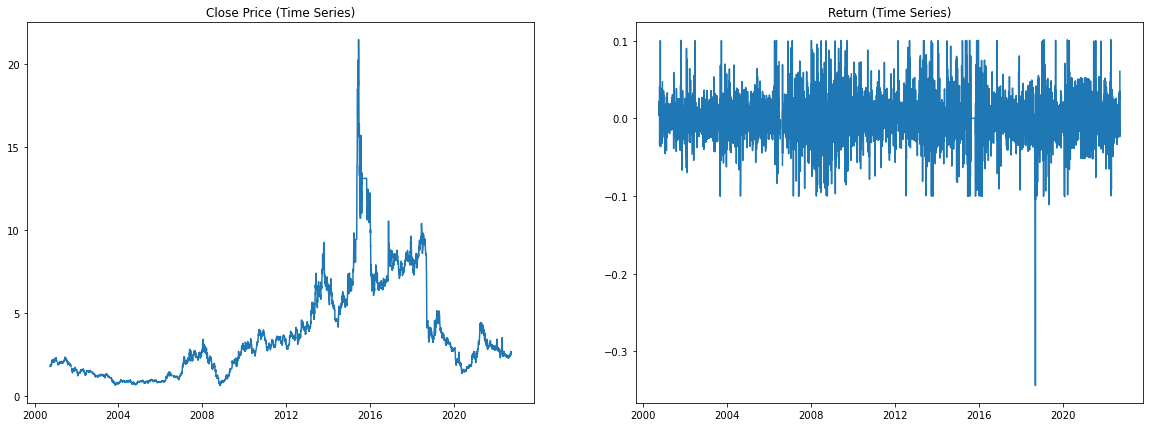

In [4]:
plt.figure(figsize=(20, 7)) 
plt.subplot(1,2,1)
plt.title("Close Price (Time Series)")  
plt.plot(NCE_historical["Date"], NCE_historical["Close"])
plt.subplot(1,2,2)
plt.title("Return (Time Series)")  
plt.plot(NCE_historical["Date"], NCE_historical["Return"])

In [5]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


## Question 4

In [6]:
def stock_data_processing(NCE_historical):
    NCE_historical = NCE_historical.reset_index()
    NCE_historical["shift"] =  NCE_historical["Adj Close"].shift()
    NCE_historical["Return"] = (NCE_historical["Adj Close"] - NCE_historical["shift"])/NCE_historical["shift"]
    return NCE_historical

In [7]:
def Calculate_avg_sd(data, col_name):
    mean = data[col_name].mean()
    sd = data[col_name].std()
    return [mean, sd]

In [8]:
def Select_date(data, open_time, close_time):
    con1 = data['Date']>=open_time
    con2 = data['Date']<=close_time
    data = data[con1&con2]
    return data

In [9]:
NCE_history_3Month = Select_date(NCE_historical, '2022-06-17', '2022-09-17')
NCE_history_halfYear = Select_date(NCE_historical, '2022-03-17', '2022-09-17')
NCE_history_Year = Select_date(NCE_historical, '2021-09-17', '2022-09-17')
NCE_history_ThreeYear = Select_date(NCE_historical, '2019-09-17', '2022-09-17')
NCE_history_FiveYear = Select_date(NCE_historical, '2017-09-17', '2022-09-17')
NCE_history_3Month = stock_data_processing(NCE_history_3Month)
NCE_history_halfYear = stock_data_processing(NCE_history_halfYear)
NCE_history_Year = stock_data_processing(NCE_history_Year)
NCE_history_ThreeYear = stock_data_processing(NCE_history_ThreeYear)
NCE_history_FiveYear = stock_data_processing(NCE_history_FiveYear)

In [10]:
avg_return_list = [Calculate_avg_sd(NCE_history_3Month, "Return")[0], 
                   Calculate_avg_sd(NCE_history_halfYear, "Return")[0], 
                   Calculate_avg_sd(NCE_history_Year, "Return")[0], 
                   Calculate_avg_sd(NCE_history_ThreeYear, "Return")[0], 
                   Calculate_avg_sd(NCE_history_FiveYear, "Return")[0]]
sd_return_list = [Calculate_avg_sd(NCE_history_3Month, "Return")[1], 
                   Calculate_avg_sd(NCE_history_halfYear, "Return")[1], 
                   Calculate_avg_sd(NCE_history_Year, "Return")[1], 
                   Calculate_avg_sd(NCE_history_ThreeYear, "Return")[1], 
                   Calculate_avg_sd(NCE_history_FiveYear, "Return")[1]]
q4_df = pd.DataFrame({"Period":["3 Month", "6 Months", "1 Year", "3 Years", "5Years"], 
                      "Mean Return": avg_return_list, "Standard Deviation": sd_return_list})
q4_df 

,Period,Mean Return,Standard Deviation
0,3 Month,0.000920,0.014151
1,6 Months,0.000806,0.026414
2,1 Year,-0.000570,0.025570
3,3 Years,0.000048,0.028279
4,5Years,-0.000558,0.029454
